<a href="https://colab.research.google.com/github/jvan809/friendly-rotary-phone/blob/main/Decision_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1


### Manual Calculation

EV(Invest in A) = (200k + 80k + -30k) / 3 = 83.3k, 
EV(Invest in B) = (150k + 100k + 10k) / 3 = 86.7k, 
EV(Do not invest) = (0+0+0)/3 = 0

Maximum expected utility = Invest in B with EV 86.7k

### Regret Matrix
\begin{array}{cccc} \hline
Decision & \text{High Demand} & \text{Medium Demand} & \text{Low Demand} \\ \hline
\text{Invest in A} & 0 & 20,000 & 40,000 \\
\text{Invest in B} & 50,000 & 0 & 0 \\
\text{Don't invest} & 200,000 & 100,000 & 10,000 \\ \hline
\end{array}

Minimax regret by Investing in A (40k vs 50k and 200k)

### Discussion of base case
Both A and B are possibly optimal depending on framework. The only clearly sub-optimal decision is to not invest, which is dominated by B. 

In [2]:
#@title Interactive Code { run: "auto", vertical-output: true, display-mode: "both" }

import numpy as np
import matplotlib.pyplot as plt

# Inputs
weights = [1, 1, 1] #@param
payoffs = {"Invest in A": [200, 80, -30], "Invest in B": [150, 100, 10], "Do not invest": [0, 0, 0]} #@param

numStates = len(weights)
for option in payoffs:
  assert len(payoffs[option]) == numStates, f"Weights different length to {option} payoffs"


def max_expected_value(weights, payoffs):  
  # normalise weights to get P(state) for each state of nature
  probs = [weight / sum(weights) for weight in weights]

  # calculate expected value of each option
  EV = {}
  for option in payoffs:
    EV[option] = sum([probs[i] * payoffs[option][i] for i in range(numStates)])
  print({key: round(EV[key],2) for key in EV})
  
  # print best option
  print(f"Best expected value {max(EV.values()):.4} from option {max(EV, key=EV.get)}")

def minimax_regret(payoffs):
  # calculate and show regret table
  regrets = {option: [] for option in payoffs}
  for i in range(numStates):
    results = [payoffs[option][i] for option in payoffs]
    for option in payoffs:
      r = max(results) - payoffs[option][i]
      regrets[option].append(r)

  print(regrets)

  maxregrets = {option: max(regrets[option]) for option in payoffs}
  # print(maxregrets)

  # print minimax regret 
  print(f"Minimax Regret {min(maxregrets.values())} from option {min(maxregrets, key=maxregrets.get)}")

max_expected_value(weights, payoffs)
minimax_regret(payoffs)

{'Invest in A': 83.33, 'Invest in B': 86.67, 'Do not invest': 0.0}
Best expected value 86.67 from option Invest in B
{'Invest in A': [0, 20, 40], 'Invest in B': [50, 0, 0], 'Do not invest': [200, 100, 10]}
Minimax Regret 40 from option Invest in A


In [3]:
#@title Examples {display-mode: "both"}

import numpy as np
import matplotlib.pyplot as plt

print("Default Example")
weights = [1, 1, 1]
payoffs = {"Invest in A": [200, 80, -30], "Invest in B": [150, 100, 10], "Do not invest": [0, 0, 0]}
max_expected_value(weights, payoffs)
minimax_regret(payoffs)

print("\nOnly High Demand")
weights = [1, 0, 0]
max_expected_value(weights, payoffs)
minimax_regret(payoffs)

print("\nOnly Medium Demand")
weights = [0, 1, 0]
max_expected_value(weights, payoffs)
minimax_regret(payoffs)
# note weights don't affect regret matrix so regret can be biased against rare bad outcomes based on magnitude

print("\n Shift 20k from Medium to Low Demand Performance for Investing in B")
weights = [1, 1, 1]
payoffs = {"Invest in A": [200, 80, -30], "Invest in B": [150, 80, 30], "Do not invest": [0, 0, 0]}
max_expected_value(weights, payoffs)
minimax_regret(payoffs)

Default Example
{'Invest in A': 83.33, 'Invest in B': 86.67, 'Do not invest': 0.0}
Best expected value 86.67 from option Invest in B
{'Invest in A': [0, 20, 40], 'Invest in B': [50, 0, 0], 'Do not invest': [200, 100, 10]}
Minimax Regret 40 from option Invest in A

Only High Demand
{'Invest in A': 200.0, 'Invest in B': 150.0, 'Do not invest': 0.0}
Best expected value 200.0 from option Invest in A
{'Invest in A': [0, 20, 40], 'Invest in B': [50, 0, 0], 'Do not invest': [200, 100, 10]}
Minimax Regret 40 from option Invest in A

Only Medium Demand
{'Invest in A': 80.0, 'Invest in B': 100.0, 'Do not invest': 0.0}
Best expected value 100.0 from option Invest in B
{'Invest in A': [0, 20, 40], 'Invest in B': [50, 0, 0], 'Do not invest': [200, 100, 10]}
Minimax Regret 40 from option Invest in A

 Shift 20k from Medium to Low Demand Performance for Investing in B
{'Invest in A': 83.33, 'Invest in B': 86.67, 'Do not invest': 0.0}
Best expected value 86.67 from option Invest in B
{'Invest in A': [

### Discussion of examples

- Changes in probabilities can't change the regret matrix, which can lead to odd situations were our minimax regret decision can be definied by very unlikely or even impossible states of nature
- max regret for an option is based only on its worst case (or alternatives best case) as seen in the last example where the EV doesn't change but the minimax regret does (also noting regret on A changes because of B)
- changes in probabilities do change the EV, and removing the risk by setting all but one weight to zero makes it a simple maximisation 
- changes in any payoff also affect EV but only in proportion to their weight

### Conclusion
Either A or B are valid options, with the best EV option based on the probabilities of different demand levels, and max regret based on the low demand case for A and the high demand case for B.

In a broader context, I would expect making an absolute loss from investing in A in the low demand case to have other logistic/social concerns such that the actual utility of this case is less than the direct -30k, and therefore the regret analysis could be altered depending on these indirect or non-monetary costs. My assumption would be the max regret from A would turn out to be worse than 'losing' 50k profit in High demand, so as a single reccomendation I would choose B.



## Question 2

[0.419, 0.368, 0.213]
{'Invest in A': 106.85, 'Invest in B': 101.78, 'Do not invest': 0.0}
Best expected value 106.8 from option Invest in A

Equal Probabilites Case:
{'Invest in A': 83.33, 'Invest in B': 86.67, 'Do not invest': 0.0}
Best expected value 86.67 from option Invest in B


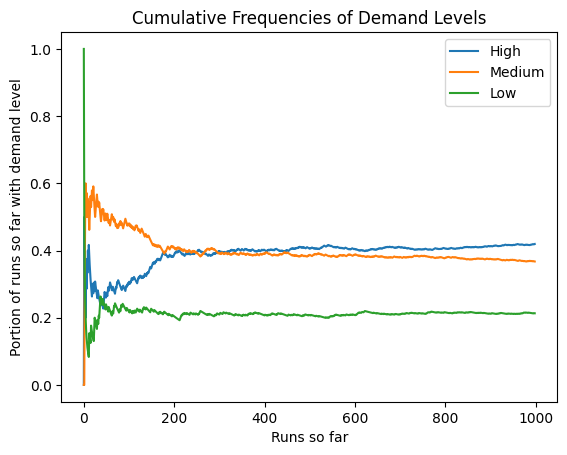

In [8]:
#@title Code/Simulation { run: "auto", vertical-output: true, display-mode: "both" }

import numpy as np
import matplotlib.pyplot as plt

n = 1000 #@param {type:"integer"}

rng = np.random.default_rng(seed=809)
conditionToDemand = {"Good": [.6, .3, .1], "Moderate": [.3, .5, .2], "Poor": [.1, .4, .5]}
counter = {"High": 0, "Medium": 0, "Low": 0}

demandSample = []
for i in range(n):
  # You could vectorise this by taking the counts of conditions
  conditionSample = rng.choice(["Good", "Moderate", "Poor"], p = [.5, .3, .2])
  demand = rng.choice(["High", "Medium", "Low"], p = conditionToDemand[conditionSample])
  demandSample.append(demand)
  counter[demand] += 1

counter
cumfreq = [[demandSample[:i].count(key)/i for i in range(1,len(demandSample))] for key in ["High", "Medium", "Low"]]
[plt.plot(cumLevel) for cumLevel in cumfreq]
plt.legend(["High", "Medium", "Low"])
plt.title("Cumulative Frequencies of Demand Levels")
plt.xlabel("Runs so far")
plt.ylabel("Portion of runs so far with demand level")
# p = plt.bar(counter.keys(), counter.values())
# plt.title("Frequency of Market Demand Levels, N = 1000")

payoffs = {"Invest in A": [200, 80, -30], "Invest in B": [150, 100, 10], "Do not invest": [0, 0, 0]}
weights = list(counter.values())
print([w / sum(weights) for w in weights])
max_expected_value(weights, payoffs)
print("\nEqual Probabilites Case:")
max_expected_value([1,1,1], payoffs)

### Results

High and Medium demand seems to be more common than low demand, with high and medium making up ~40% each and low being ~20%.

Plotting the cumulative frequencies over sample size we can see that the proportions become less variable and more accurate as N increases.

Hand calculation gives
High: 41%, Medium: 38% and Low: 21%: which lines up with my experiment

Using the updated probabilities, the maximum EV decision changes from B to A. The EV for either option is increased but increases more for A. This means that A is the optimal decision using either framework considered. This is because the state of nature more preferential for B over A is much less likely than assumed. The assumption of equal probabilities is not useful for this model. In general, empirical models allow us to make more informed decisions based on real world data - even a model like this is still useful as we can reason more effectively about smaller steps (in this case two smaller questions vs . 



## Question 3

### Best summary of weighted sum using SME is the weighted mean


$ \frac{d}{d\theta}(\frac{1}{N}\sum_{i=1}^{N} w_i(\theta^*-x_i)^2) = 0 \text{ [extrema at zero deriative]}$ 

$ \frac{1}{N}\sum_{i=1}^{N} 2w_i(\theta^*-x_i) = 0 $

$\sum_{i=1}^{N} (w_i\theta^*- w_ix_i) = 0 \text{ [divide by 2/N, distribute weight]}$

$\sum_{i=1}^{N} w_i\theta^*  = \sum_{i=1}^{N} w_ix_i \text{ [seperate terms as two sums]}$

$\theta^* \sum_{i=1}^{N} w_i  = \sum_{i=1}^{N} w_ix_i \text{ [theta star is constant so bring out of sum]}$

$\theta^* = \frac{\sum_{i=1}^{N} w_ix_i}{ \sum_{i=1}^{N} w_i}$

found median 10.2 (numpy median is 10.2, mean is 107.4)
median difference 6e-07, re 6e-06 %


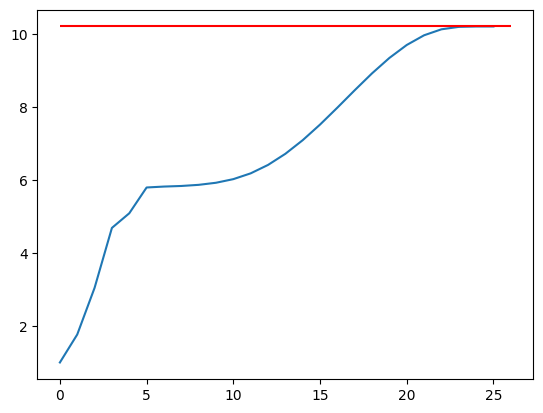

In [14]:
#@title IRLS for median of set of scalars

import numpy as np
import matplotlib.pyplot as plt

array = [1.1, 4.5, 2.1, 10.2, 16.1, 5.8, 900, 11, 15.6] #@param
max_iter = 30 #@param {type: "integer"}
tol = 0.001 #@param {type:"number"}
initial_guess = 1 #@param {type: "number"}

def median_IRLS(array, max_iter = 100, tol = 0.001, initial_guess = 0):
  delta = 0.001
  i = 0
  value_at_iter = [initial_guess]

  while i < 1 or i < max_iter and abs(value_at_iter[-1] - value_at_iter[-2]) > tol:
    old = value_at_iter[-1]
    weights = [1/max(abs(old - x),delta) for x in array]
    new = sum([w*x for (w,x) in zip(weights, array)]) / sum(weights)
    value_at_iter.append(new)
    i += 1

  # value_at_iter
  if len(array) % 2 == 1:
    print(f"found median {new:.1f} (numpy median is {np.median(array):.1f}, mean is {np.mean(array):.1f})")
    print(f"median difference {abs(np.median(array)-new):.1}, re {abs(np.median(array)-new)/new*100:.1} %")
  else: 
    print(f"found median {new:.1f}")
  return value_at_iter


value_at_iter = median_IRLS(array, max_iter, tol, initial_guess)
plt.plot(value_at_iter)
x = plt.hlines(np.median(array), 0, len(value_at_iter), colors = 'r')


### Comparison to numpy median and mean
- numpy median is the same as my iterative median :)
- numpy mean is much higher due to outlier at 900
- more technically, the 1/abs(median - sample) is a much lower weight than 1 for the point 900, so equal weighting RSM (i.e. the mean) will skew much higher

In [21]:
#@title Examples (could expand this)
median_IRLS([10])
median_IRLS([10, 30, 100])
x = median_IRLS([-1, 0, 1, 1, 2])


found median 10.0 (numpy median is 10.0, mean is 10.0)
median difference 0e+00, re 0e+00 %
found median 30.0 (numpy median is 30.0, mean is 46.7)
median difference 3e-08, re 8e-08 %
found median 1.0 (numpy median is 1.0, mean is 0.6)
median difference 0.0006, re 0.06 %


## Question 4

found median [0.59180559 0.50658605]


(0.5883214969449745, 0.5199207241629582)

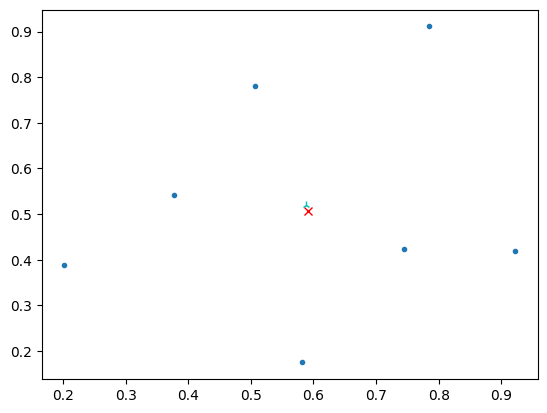

In [ ]:
#@title IRLS for median of set of scalars
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed()

initial_guess = [.5,.5] #@param
max_iter = 3000 #@param {type: "integer"}
tol = 0.0001 #@param {type:"number"}
oneDim = [1.1, 4.5, 2.1, 10.2, 16.1, 5.8, 900, 11, 15.6] #[[x, 0] for x in oneDim]
npoints = 7 #@param
array = [[random.uniform(0,1),random.uniform(0,1)] for i in range(npoints)]


def median_vector_IRLS(array, max_iter = 100, tol = 0.001, initial_guess = 0):
  vector_lengths = [len(x) for x in array] + [len(initial_guess)]
  assert max(vector_lengths) == min(vector_lengths), "Vectors in array and initial guess have multiple lengths"

  delta = 0.001
  i = 0
  value_at_iter = [np.array(initial_guess)]

  while i < 1 or i < max_iter and np.linalg.norm(np.subtract(value_at_iter[-1],value_at_iter[-2])) > tol:
    old = value_at_iter[-1]
    weights = [[1/max(np.linalg.norm(np.subtract(old,x)),delta)] for x in array]
    new = sum(np.multiply(weights,array)) / np.sum(weights)
    value_at_iter.append(new)
    i += 1

  # value_at_iter
  print(f"found median {new}")
  
  return new, value_at_iter

med, path = median_vector_IRLS(array, max_iter, tol, initial_guess)
plt.plot([x[0] for x in array],[x[1] for x in array],'.')
# plt.plot([x[0] for x in path],[x[1] for x in path],'r.')
plt.plot(med[0],med[1],'rx')
plt.plot(np.mean([x[0] for x in array]), np.mean([x[1] for x in array]),'c2')
np.mean([x[0] for x in array]), np.mean([x[1] for x in array])


found median [10.19999941  0.        ]


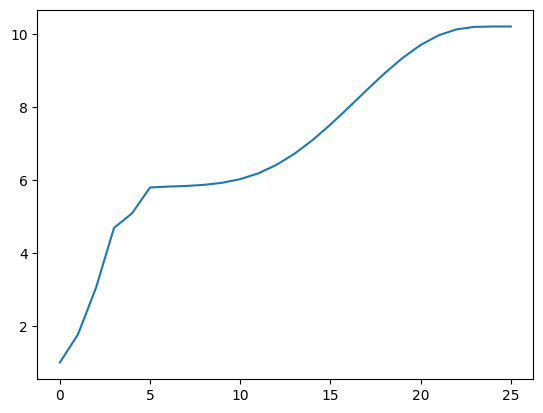

In [ ]:
#@title One Dimensional Case
oneDim = [1.1, 4.5, 2.1, 10.2, 16.1, 5.8, 900, 11, 15.6]
array = [[x, 0] for x in oneDim]
initial_guess = [1,0] #@param
max_iter = 30 #@param {type: "integer"}
tol = 0.001 #@param {type:"number"}

med, path = median_vector_IRLS(array, max_iter, tol, initial_guess) # same answer
plt.plot([x[0] for x in path]) # same path